## The Problem

A leading food-delivery startup is aiming to spend its marketing budget more wisely. They have already launched 5 campagins in the past year. The task is to build a predictive model that will produce the highest profit for the next marketing campaign. The new campaign (campaign 6) aims at getting customers to use a new "shopping cart builder" where groceries are added to a users cart based on recipes they selected. The data is based on pilot campaign carried involving 2240 customers. The previous campaign had a success rate of 15% meaning only 15% of customers made a purchase after intervention. The average order size of customers who made a purchase was \\$109. On average, it cost \\$3 per "potential customer" to treat them with a marketing campaign.

### Information about the dataset
Data Glossary

1. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
7. Complain - 1 if customer complained in the last 2 years
8. DtCustomer - date of customer’s enrolment with the company
9. Education - customer’s level of education
10. Marital - customer’s marital status
11. Kidhome - number of small children in customer’s household
12. Teenhome - number of teenagers in customer’s household
13. Income - customer’s yearly household income
14. MntFishProducts - amount spent on fish products in the last 2 years
15. MntMeatProducts - amount spent on meat products in the last 2 years
16. MntFruits - amount spent on fruits products in the last 2 years
17. MntSweetProducts - amount spent on sweet products in the last 2 years
18. MntWines - amount spent on wine products in the last 2 years
19. MntGoldProds - amount spent on gold products in the last 2 years
20. NumDealsPurchases - number of purchases made with discount
21. NumCatalogPurchases - number of purchases made using catalogue
22. NumStorePurchases - number of purchases made directly in stores
23. NumWebPurchases - number of purchases made through company’s web site
24. NumWebVisitsMonth - number of visits to company’s web site in the last month
25. Recency - number of days since the last purchase




# Initial Tasks

In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/Users/sadafbandeali/Desktop/UW/Winter'24/IMT 574/Midterm/marketing_campaign.csv",delimiter=';')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
df.isnull().sum() / df.shape[0]

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [5]:
# Cleaning and saving Income variable

df = df.dropna(subset=['Income'])

In [6]:
# Creating a total_puchases column and total_amount_spent column. 
# I left out NumDealsPurchases column because the other purchase categories would have already accounted for the discounts data 

df['Total_Purchases'] = df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df['Total_Amount_Spent'] = df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']
df.head(5)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Total_Amount_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,22,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,4,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,20,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,6,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,14,422


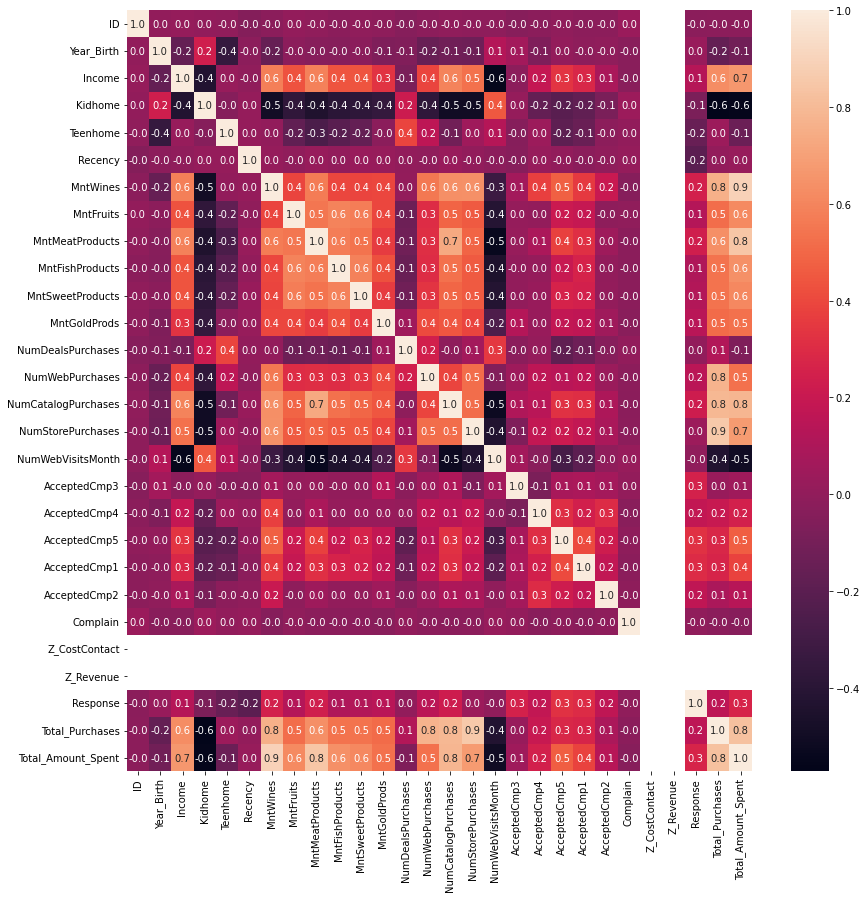

In [9]:
import seaborn as sns

# Making a heatmap to conduct exploratory data analysis on our dataset

df_1 = df.drop(columns=['Education','Marital_Status', 'Dt_Customer'])  # Dropping variables to be able to use df in heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(df_1.corr(), annot=True, fmt='.1f')
plt.show()

# Making a Clustering Algorithm to Perform Customer Segmentation

/Users/sadafbandeali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sadafbandeali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sadafbandeali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sadafbandeali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

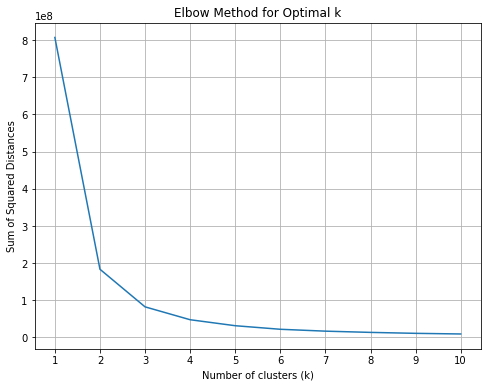

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scaling the dataframe
scaler = StandardScaler()
scaler.fit_transform(df[['Total_Purchases', 'Total_Amount_Spent', 'Recency']])

# Calculating SSE (sum of squared distances) for different values of k to find out optimal k using elbow method
inertias = []
label_dict = {}
K = list(range(1, 11))  
for k in K: 
    kmeans = KMeans(n_clusters=k, random_state= 42)
    kmeans.fit(df[['Total_Purchases', 'Total_Amount_Spent', 'Recency']])
    label_dict[k] = kmeans.labels_
    inertias.append(kmeans.inertia_)
    
# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertias)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


The first thing I need to decide is how many clusters I will chose to divide my data in. In cases where we lack deep domain expertise, it is best to start with finding the cluster value using elbow method analysis. According to the elbow method, the point at which the distortion/intertia starts decreasing in a linear fashion is our optimal k value for our dataset. We can see that in the above graph at k = 4, the graph starts to become linear. This is a good indicator that I can chose 4 clusters for my customer segmentation. 

In [11]:
# KMeans Clustering Algorithm with only the important features

kmeans = KMeans(n_clusters=4, random_state= 42)
y_means = kmeans.fit_predict(df[['Total_Purchases', 'Total_Amount_Spent', 'Recency']])
centroids = kmeans.cluster_centers_

/Users/sadafbandeali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMEANS: k = 4


/Users/sadafbandeali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


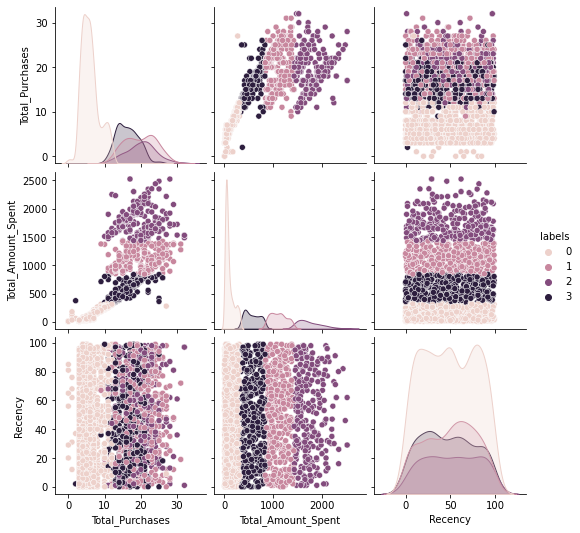

In [12]:
# Making a pairplot to visualize the clusters 

print(f"KMEANS: k = {4}")
viz_df = df[['Total_Purchases', 'Total_Amount_Spent', 'Recency']].copy()
viz_df['labels'] = label_dict[4]
sns.pairplot(viz_df, hue="labels")
plt.show()

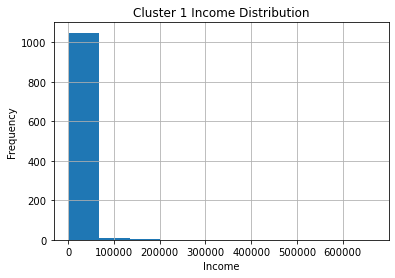

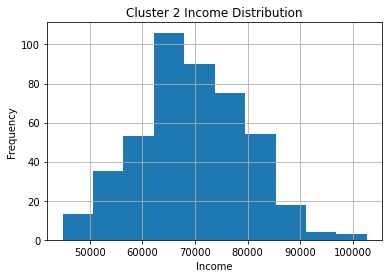

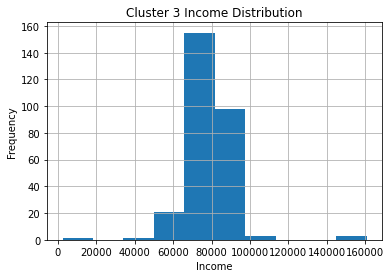

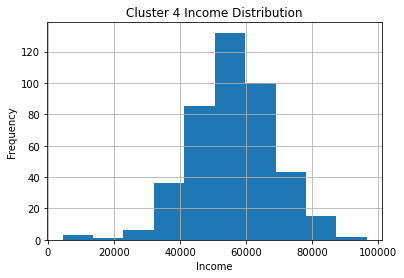

In [13]:
# Defining a function to understand how different variables plot when seen in relation to our clusters
# 1. INCOME

def plot_cluster_histograms(y_means, df):
    num_clusters = len(set(y_means))
    
    for cluster_label in range(num_clusters):
        cluster_data = df.iloc[np.where(y_means == cluster_label)]
        plt.hist(cluster_data['Income'], bins=10)
        plt.title(f'Cluster {cluster_label + 1} Income Distribution')
        plt.xlabel('Income')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Plotting
plot_cluster_histograms(y_means, df)


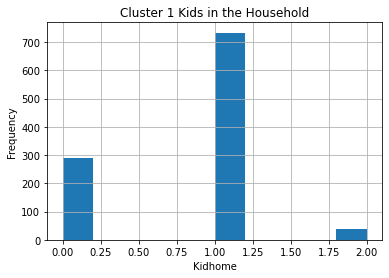

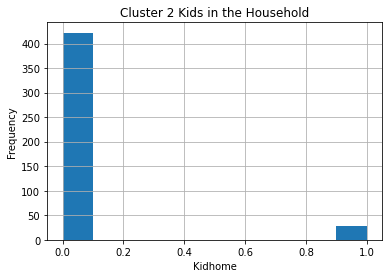

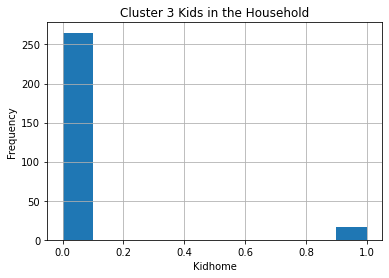

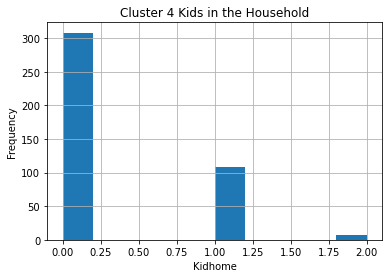

In [14]:
# Defining a function to understand how different variables plot when seen in relation to our clusters
# 2. Kids in Household

def plot_cluster_histograms(y_means, df):
    num_clusters = len(set(y_means))
    
    for cluster_label in range(num_clusters):
        cluster_data = df.iloc[np.where(y_means == cluster_label)]
        plt.hist(cluster_data['Kidhome'], bins=10)
        plt.title(f'Cluster {cluster_label + 1} Kids in the Household')
        plt.xlabel('Kidhome')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Plotting
plot_cluster_histograms(y_means, df)

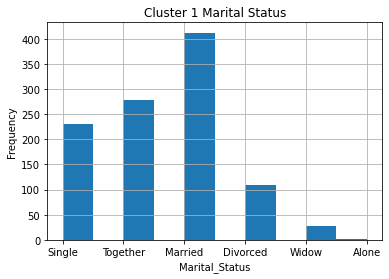

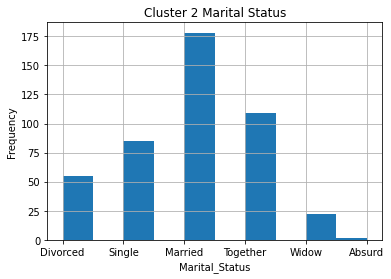

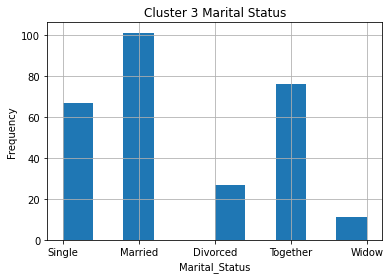

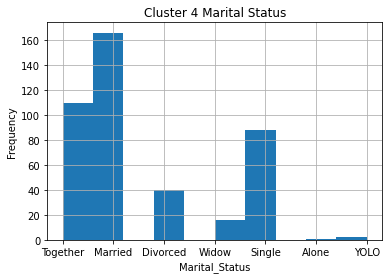

In [15]:
# Defining a function to understand how different variables plot when seen in relation to our clusters
# 3. Marital Status

def plot_cluster_histograms(y_means, df):
    num_clusters = len(set(y_means))
    
    for cluster_label in range(num_clusters):
        cluster_data = df.iloc[np.where(y_means == cluster_label)]
        plt.hist(cluster_data['Marital_Status'], bins=10)
        plt.title(f'Cluster {cluster_label + 1} Marital Status')
        plt.xlabel('Marital_Status')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Plotting
plot_cluster_histograms(y_means, df)

### Determining the 4 types of Customers

Our company has 4 types of customers:

**Cluster 1** has our lowest income customers, making less than \\$10k are mostly married. They have purchased 5-6 times from us, have spent approximately \\$250 and have purchased products 40 days ago.

**Cluster 2** has customers who make around \\$65k, mostly have 1 child, and are mostly married. They have purchased 4 times from us and spent almost negigible dollars. They have last purchased from us 20 days ago.

**Cluster 3** has customers who make around \\$70k, have mostly no kids, and are mostly married or living together with their partner. They have purchased 5 times from us, and spent approx \\$250 and have purchased products 45 days ago.

**Cluster 4** has customers who make around \\$55k and mostly have no children, but some have 1, and are mostly married or living together with a partner. They have purchased 30 times from us, and spent approx \\$2500 and have purchased products 100 days ago. 



# Building a Predictive Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Define independent and target variable
X_1 = df[['Total_Purchases', 'Total_Amount_Spent', 'Recency']]
y_1 = df['Response']

#  Training and testing
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state= 42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_1, y_train_1)

# Predicting
y_pred_log = log_reg.predict(X_test_1)

# Calculating accuracy, precision, and recall for Logistic Regression Model
accuracy_log = round(accuracy_score(y_test_1, y_pred_log), 2)
print("Accuracy of Model 1(Logistic Regression):", accuracy_log)
precision_log = round(precision_score(y_test_1, y_pred_log), 2)
print("Precision of Model 1(Logistic Regression):", precision_log)
recall_log = round(recall_score(y_test_1, y_pred_log), 2)
print("Recall of Model 1(Logistic Regression):", recall_log)


Accuracy of Model 1(Logistic Regression): 0.87
Precision of Model 1(Logistic Regression): 0.63
Recall of Model 1(Logistic Regression): 0.18


In [27]:
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_1, y_train_1)

# Predicting
y_pred_dt = dt_classifier.predict(X_test_1)


# Calculating accuracy, precision, and recall for Decision Tree Classifier
accuracy_dt = round(accuracy_score(y_test_1, y_pred_dt), 2)
print("Accuracy of Model 2(Decision Tree):", accuracy_dt)
precision_dt = round(precision_score(y_test_1, y_pred_dt), 2)
print("Precision of Model 2(Decision Tree):", precision_dt)
recall_dt = round(recall_score(y_test_1, y_pred_dt), 2)
print("Recall of Model 2(Decision Tree):", recall_dt)

Accuracy of Model 2(Decision Tree): 0.79
Precision of Model 2(Decision Tree): 0.27
Recall of Model 2(Decision Tree): 0.27


In [28]:
from sklearn.ensemble import RandomForestClassifier


# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_1, y_train_1)

# Predicting
y_pred_rf = rf_classifier.predict(X_test_1)

# Calculating accuracy, precision, and recall for the Random Forest classifier
accuracy_rf = round(accuracy_score(y_test_1, y_pred_rf), 2)
print("Accuracy of Model 3(Random Forest):", accuracy_rf)
precision_rf = round(precision_score(y_test_1, y_pred_rf), 2)
print("Precision of Model 3(Random Forest):", precision_rf)
recall_rf = round(recall_score(y_test_1, y_pred_rf), 2)
print("Recall of Model 3(Random Forest):", recall_rf)


Accuracy of Model 3(Random Forest): 0.85
Precision of Model 3(Random Forest): 0.46
Recall of Model 3(Random Forest): 0.26


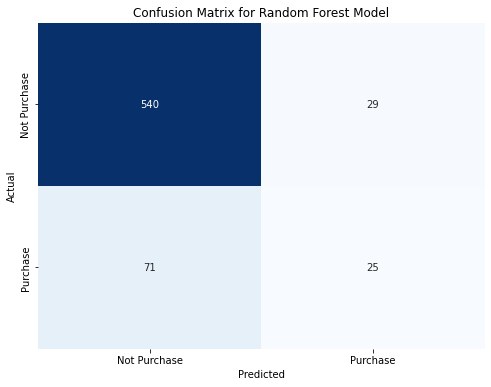

In [24]:
from sklearn.metrics import confusion_matrix


# Confusion matrix for random forest
conf_matrix = confusion_matrix(y_test_1, y_pred_rf)

# Defining class labels
class_labels = ['Not Purchase', 'Purchase']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Explanation

- I chose a logistic regression model because it helps us model the probablity of an outcome, in relaiton to an iput. In our case,'Response' variable gives us a clear sense of a customer's proclivity to accepting our 6th campaign and becomes the dependent varaiable. The independent variables here are 'Recency', Total_Purchases',and 'Total_Amount_Spent'. Response is a great dependent variable because it helps us directly answer our question: given an intervention, i.e. in case of Campaign 6. If customers have previously been interested, it is hihgly likely that they'd still be interested. Next, I chose a decision tree classifier and random forest to classify if the customer would make a purchase after intervention, i.e our 6th Campaign.

### Deciding Evaluation Metric

- Now we need to evaluate our predictive models against the previous sucess rate of 15%, that is only 15% people made a purchase after intervention. We would take recall as our evaluation metric because we need to minimize false negatives, that is customers who actually purchased but our model labelled them as not purchased. This is highly imperative in our context, because we want to target customers who've previously been interested in our product/campaigns and have responded positively for our newest campaign. 

- Accuracy gives us a sense of how our overall model is performing, but lacks in answering more preciesly the condition we want to understand, that is, what happens to customer purchases if we make an intervention. Precision is also a good metric, because it gives us an answer to how often our model was able to correctly predict that the customer made a purchase in response to an intervention, out of all the times a customer made a purchase. But recall should be consdiered more over precision when evaluating the models because we want to avoid false negatives.


### Choosing the Best Model

The top 2 contenders are MODEL 1: Logistic Regression and MODEL 3: Random Forest. I chose the best model to be MODEL 3: Random Forest. 

- **Random Forest:** With an overall accuracy of 84%, it has a precision of 46%, and a recall of 26%. 

- **Logistic Regression:** With an overall accuracy of 86%, it has a precision of 62%, and a recall of 17%. 

- **Decision Tree:** With an overall accuracy of 79%, it has a precision of 27%, and a recall of 27%. 

Even though Decision tree has highest recall, it fares badly in accuracy and precision. Therefore, between Random Forest and Logistic Regression, I would chose Random Forest because it has an overall better accuracy and a much better recall value. 

### Evaluating our Best Model in relation to the 15% Sucess Rate of Previous Marketing Campaign (the benchmark)

- Now let's evaluate our model's success in comparison to the benchmark/success rate for the previous campaign, which was was 15%. This means that 15% x 2240 = 336 people purchased after an intervention. Our random forest model got 71 customers wrong, that is, it predicted them to not purchase when they actually purchased.

- Given that the random forest model incorrectly predicted 71 of the 336 purchasers to not make a purchase: Success rate = 336-71/336 x 100 = 79%. Therefore our model exceeds the benchmark.

# Performance of model with Customer Segments

In [32]:
# Making different data frames for each clusters
df['Clusters'] = kmeans.labels_

cluster_1 = df[df['Clusters'] == 0].copy()
cluster_2 = df[df['Clusters'] == 1].copy()
cluster_3 = df[df['Clusters'] == 2].copy()
cluster_4 = df[df['Clusters'] == 3].copy()

In [35]:
# CLUSTER 1
X_C1 = cluster_1[['Total_Purchases', 'Total_Amount_Spent', 'Recency']]
y_C1 = cluster_1['Response']

# Using random forest model to predict
y_pred_C1 = rf_classifier.predict(X_C1)

# Calculating Accuracy, Precision, and Recall
accuracy_C1 = round(accuracy_score(y_C1, y_pred_C1), 2)
print("Accuracy of Model with Cluster 1:", accuracy_C1)
precision_C1 = round(precision_score(y_C1, y_pred_C1), 2)
print("Precision of Model with Cluster 1:", precision_C1)
recall_C1 = round(recall_score(y_C1, y_pred_C1), 2)
print("Recall of Model with Cluster 1:", recall_C1)


Accuracy of Model with Cluster 1: 0.96
Precision of Model with Cluster 1: 0.89
Recall of Model with Cluster 1: 0.67


In [36]:
# CLUSTER 2
X_C2 = cluster_2[['Total_Purchases', 'Total_Amount_Spent', 'Recency']]
y_C2 = cluster_2['Response']

# Using random forest model to predict
y_pred_C2 = rf_classifier.predict(X_C2)

# Calculating Accuracy, Precision, and Recall
accuracy_C2 = round(accuracy_score(y_C2, y_pred_C2), 2)
print("Accuracy of Model with Cluster 2:", accuracy_C2)
precision_C2 = round(precision_score(y_C2, y_pred_C2), 2)
print("Precision of Model with Cluster 2:", precision_C2)
recall_C2 = round(recall_score(y_C2, y_pred_C2), 2)
print("Recall of Model with Cluster 2:", recall_C2)

Accuracy of Model with Cluster 2: 0.95
Precision of Model with Cluster 2: 0.9
Recall of Model with Cluster 2: 0.78


In [39]:
# CLUSTER 3
X_C3 = cluster_3[['Total_Purchases', 'Total_Amount_Spent', 'Recency']]
y_C3 = cluster_3['Response']

# Using random forest model to predict
y_pred_C3 = rf_classifier.predict(X_C3)

# Calculating Accuracy, Precision, and Recall
accuracy_C3 = round(accuracy_score(y_C3, y_pred_C3), 2)
print("Accuracy of Model with Cluster 3:", accuracy_C3)
precision_C3 = round(precision_score(y_C3, y_pred_C3), 2)
print("Precision of Model with Cluster 3:", precision_C3)
recall_C3 = round(recall_score(y_C3, y_pred_C3), 2)
print("Recall of Model with Cluster 3:", recall_C3)

Accuracy of Model with Cluster 3: 0.89
Precision of Model with Cluster 3: 0.87
Recall of Model with Cluster 3: 0.85


In [41]:
# CLUSTER 4
X_C4 = cluster_4[['Total_Purchases', 'Total_Amount_Spent', 'Recency']]
y_C4 = cluster_4['Response']

# Using random forest model to predict
y_pred_C4 = rf_classifier.predict(X_C4)

# Calculating Accuracy, Precision, and Recall
accuracy_C4 = round(accuracy_score(y_C4, y_pred_C4), 2)
print("Accuracy of Model with Cluster 4:", accuracy_C4)
precision_C4 = round(precision_score(y_C4, y_pred_C4), 2)
print("Precision of Model with Cluster 4:", precision_C4)
recall_C4 = round(recall_score(y_C4, y_pred_C4), 2)
print("Recall of Model with Cluster 4:", recall_C4)

Accuracy of Model with Cluster 4: 0.96
Precision of Model with Cluster 4: 0.9
Recall of Model with Cluster 4: 0.72


### Random Forest Predictive Model Analysis with different Customer Segements

**BEST PERFORMANCE**

**Cluster 2**
Accuracy = 95%
Precision = 90%
Recall = 78%

**Cluster  3**
Accuracy = 89%
Precision = 87%
Recall = 84%

**WORST PERFORMANCE**

**Cluster 1**
Accuracy = 96%
Precision = 88%
Recall = 66%

**Cluster 4**
Accuracy = 95%
Precision = 90%
Recall = 71%


- My model excelled at predicting Cluster 2 and Cluster 3, with recall for Cluster 2 being 78% and Cluster 3 with the highest recall of 84%. Both our models perform adequately well with accuracy for Cluster 2 being 95% and precision being 90% and accuracy for Cluster 3 being 89% and precision being 87%. Again, given that our goal is to predict if the customer would make a purchase, a right prediction of older purchase is integral to predicting continued interest. 

- My model struggled at predicting Cluster 1 and Cluster 4, with recall for Cluster 1 being the lowest at 66% and Cluster 4 with a recall of 71%. Although both Models for Cluster 1 and 4 have good accuracy and precision, I have prioratized recall as the criteria for analysis, because we want to be able to minimize false negatives and be able to correctly predict the customers who made made a purchase, so that we can treat them with our campaign and optimize the dollars allocated to us. 

# Calculating Profitablity of Predictive Model

Accuracy of Model: 0.95
Precision of Model: 0.89
Recall of Model: 0.76


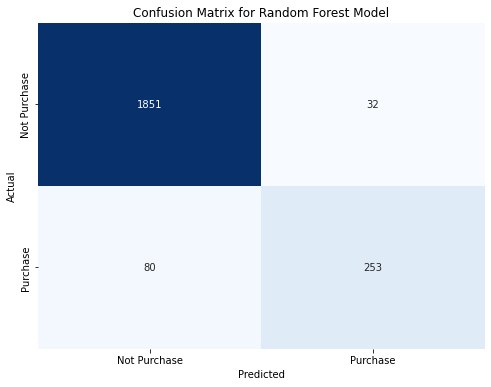

In [43]:
X_ALL = df[['Total_Purchases', 'Total_Amount_Spent', 'Recency']]
y_ALL = df['Response']

y_pred_ALL = rf_classifier.predict(X_ALL)

# Calculating Accuracy, Precision, and Recall
accuracy_ALL = round(accuracy_score(y_ALL, y_pred_ALL), 2)
print("Accuracy of Model:", accuracy_ALL)
precision_ALL = round(precision_score(y_ALL, y_pred_ALL), 2)
print("Precision of Model:", precision_ALL)
recall_ALL = round(recall_score(y_ALL, y_pred_ALL), 2)
print("Recall of Model:", recall_ALL)

# Confusion matrix
conf_matrix = confusion_matrix(y_ALL, y_pred_ALL)

# Defining class labels
class_labels = ['Not Purchase', 'Purchase']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Explanation

- With our model we would have treated a total of 253 + 80 customers = 333 customers. The cost of this campaign would be \\$333 * \\$3 = \\$999. The average customer order was \\$109. Since this model predicted 253 customers correctly, the proceeds would be \\$253 * \\$109 = \\$27,577. Subtracting the two gives us net proceeds of $26,578.

- If we didn't use the model and treated all customers with the marketing campaign, we would treat a total of 2216 customers for a cost of \\$2216 * \\$3 = \\$6,648. With an average customer order of \\$109, it would generate proceeds of (\\$253 + \\$32) * \\$109 = \\$31,065. Subtracting the two gives us net proceeds of \\$24,417.

- Using the model would be more profitable by \\$26,578 - \\$24,417 = \\$2161.